In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving coba.csv to coba.csv


In [ ]:
df = pd.read_csv("Dataset Encoding for Classification.csv")

In [ ]:
df.head()

,City,General_Category,Price_Range,Rating,Goods
0,2,0,2,4.5,6
1,2,0,2,4.9,6
2,2,0,0,4.8,6
3,2,0,2,5.0,6
4,2,0,0,4.6,6


In [ ]:
df1 = df.copy()
df1.head(50)

,City,General_Category,Price_Range,Rating,Goods
0,2,0,2,4.5,6
1,2,0,2,4.9,6
2,2,0,0,4.8,6
3,2,0,2,5.0,6
4,2,0,0,4.6,6
5,2,0,1,4.7,6
6,2,0,1,4.8,6
7,2,0,2,4.9,6
8,2,0,1,4.9,6
9,2,0,1,5.0,1


In [ ]:
X = df1.drop(['Goods'],axis=1).values
y = df1.Goods.values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=41)
X_train

array([[3. , 3. , 2. , 4.6],
       [1. , 0. , 1. , 4.8],
       [0. , 1. , 2. , 4.7],
       ...,
       [4. , 1. , 1. , 4.7],
       [1. , 2. , 0. , 4.5],
       [4. , 3. , 0. , 4.9]])

In [ ]:
classes = 9

In [ ]:
y_train=np_utils.to_categorical(y_train,num_classes=classes)
y_test=np_utils.to_categorical(y_test,num_classes=classes)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of y_train (256, 9)
Shape of y_test (64, 9)


In [ ]:
class cb(tf.keras.callbacks.Callback): 
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.9 and logs.get('val_accuracy') > 0.7):
      self.model.stop_training = True

callbacks = cb()

In [ ]:
shape = X_train.shape[1]

model=Sequential()
model.add(Dense(256,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(128, activation="relu"))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=5,epochs=500,verbose=1,callbacks=[callbacks])

Epoch 1/500
52/52 [==============================] - 2s 22ms/step - loss: 2.0919 - accuracy: 0.2188 - val_loss: 1.9110 - val_accuracy: 0.3594
Epoch 2/500
52/52 [==============================] - 0s 5ms/step - loss: 1.7755 - accuracy: 0.3398 - val_loss: 1.5621 - val_accuracy: 0.4688
Epoch 3/500
52/52 [==============================] - 0s 7ms/step - loss: 1.4518 - accuracy: 0.4297 - val_loss: 1.3053 - val_accuracy: 0.4219
Epoch 4/500
52/52 [==============================] - 0s 6ms/step - loss: 1.2752 - accuracy: 0.5234 - val_loss: 1.0717 - val_accuracy: 0.6719
Epoch 5/500
52/52 [==============================] - 0s 5ms/step - loss: 1.1252 - accuracy: 0.5508 - val_loss: 1.0201 - val_accuracy: 0.6562
Epoch 6/500
52/52 [==============================] - 0s 5ms/step - loss: 1.0081 - accuracy: 0.6133 - val_loss: 0.8290 - val_accuracy: 0.7344
Epoch 7/500
52/52 [==============================] - 0s 2ms/step - loss: 0.8595 - accuracy: 0.6992 - val_loss: 0.7120 - val_accuracy: 0.7344
Epoch 8/500


Text(0.5, 1.0, 'Training and validation loss')

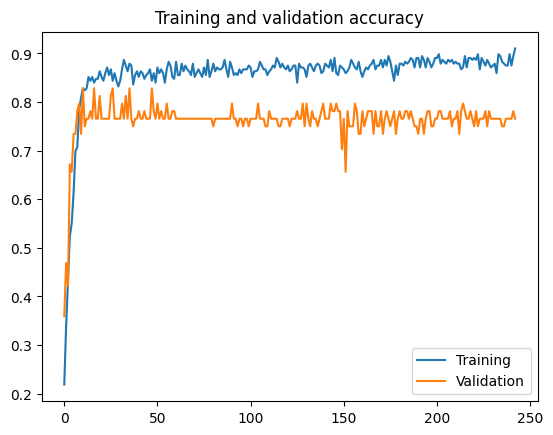

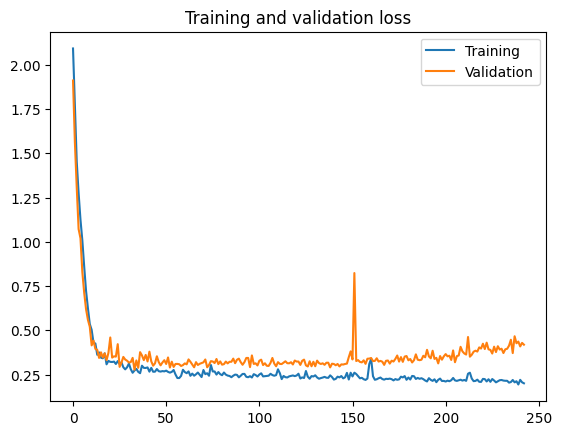

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='Training')
plt.plot  ( epochs, val_acc, label='Validation')
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss, label='Training')
plt.plot  ( epochs, val_loss, label='Validation')
plt.legend()
plt.title ('Training and validation loss')

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Saving the classification model
with open('SMEUs_ClassificationModel.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
coba = [2, 1, 1,4.2]

In [ ]:
prediction = model.predict([coba])
res = np.argmax(prediction, axis = 1)
print(res)

1/1 [==============================] - 0s 147ms/step
[7]


In [ ]:
City = {0: "Bali", 1: "Bandung", 2: "Jakarta", 3: "Surakarta", 4: "Yogyakarta"}

In [ ]:
General_Category = {0: "Craft", 1: "F&B", 2: "Fashion", 3: "Munchies"}

In [ ]:
Price Range = {0: "25.000-50.000", 1: "<25.000",2 :">50.000"}

{0: 'Craft', 1: 'F&B', 2: 'Fashion', 3: 'Munchies'}

In [ ]:
Goods = {0: "Casual Fashion", 1: "Daily Needs", 2: "Formal Fashion", 3: "Household Items", 4: "Main Course", 5: "Snack", 6: "Souvenir", 7: "Street Food", 8: "Street Snacks"}